In [71]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [72]:
# read the dataset. It comes from here: https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2024%20-%20K-Means%20Clustering/Mall_Customers.csv
dataset = pd.read_csv('Dataset/MallCustomers.csv')
# check how the dataset looks like, print the first 5 rows.
dataset.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [73]:
# check the overall structure of the dataset and the data formats
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [74]:
# check statistical values of the column with .describe() method 
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [75]:
# From the descriptions above we can see that we have 5 columns in the dataset.
# Categorical variable Gender is not shown 
# Of those CustomerID is a unique value that represent the customer and does not provide useful information.
# We are left with the remaining 3 columns: Age, Annual income and Spending Score


In [76]:
# Lets check if there are null values in the dataset
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [77]:
#Luckily, there are no null values and we do not have to worry about them.

In [78]:
# Lets check the distributions of the 3 columns
# We will drop CustomerID as it does not tell us 
# First, we will rename the columns to make using them easier
dataset.rename(columns = {'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace = True)
dataset.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot:xlabel='count', ylabel='Gender'>

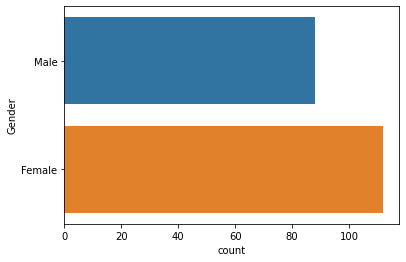

In [79]:
# count the numbers of values for Gender
sns.countplot(data=dataset,y = 'Gender')

In [80]:
# we can see that there are slightly more females in the sample but the genders are roughly equaly represented.

<AxesSubplot:xlabel='Gender', ylabel='Age'>

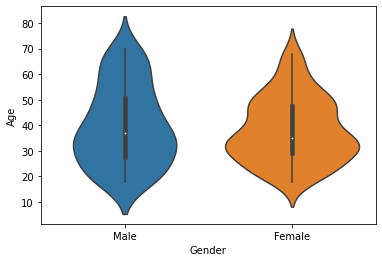

In [81]:
# plot of distribution of Age
sns.violinplot(data=dataset, x="Gender", y="Age")

<AxesSubplot:xlabel='Gender', ylabel='Annual_Income'>

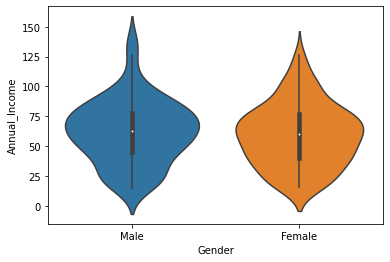

In [82]:
# plot of distribution of Annual Income
sns.violinplot(data=dataset, x="Gender", y="Annual_Income")

<AxesSubplot:xlabel='Gender', ylabel='Spending_Score'>

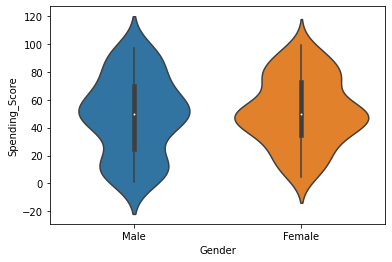

In [83]:
# plot of distribution of Spending score
sns.violinplot(data=dataset, x="Gender", y="Spending_Score")

In [84]:
# Lets see if there is some correlation between the variables (only numeric ones, gender is ommited here as it is categorical.

<AxesSubplot:>

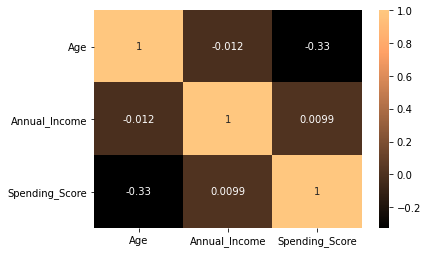

In [113]:
sns.heatmap(data=dataset.drop(['CustomerID'], axis = 1).corr(), annot=True, cmap='copper')
# we should disregard the values for CustomerID as it is just a number representing the customer. 

In [86]:
# we should disregard the values for CustomerID as it is just a number representing the customer. 
# We can see that Age and Spending score are slightly negatively correlated.

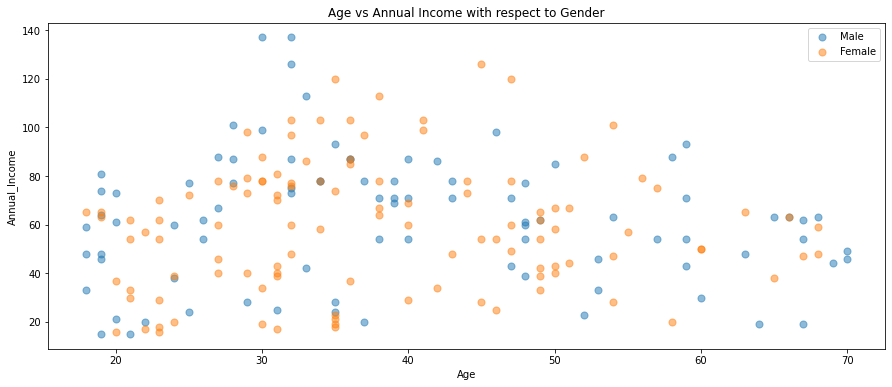

In [87]:
# Lets plot combinations of Age, Annual_Income and Spending_Score in a scatterplot to see how they are distributed with respect to the other variables.
# Age and Annual_Income
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual_Income' , data = dataset[dataset['Gender'] == gender] ,
                s = 50 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual_Income') 
plt.title('Age vs Annual Income with respect to Gender')
plt.legend()
plt.show()

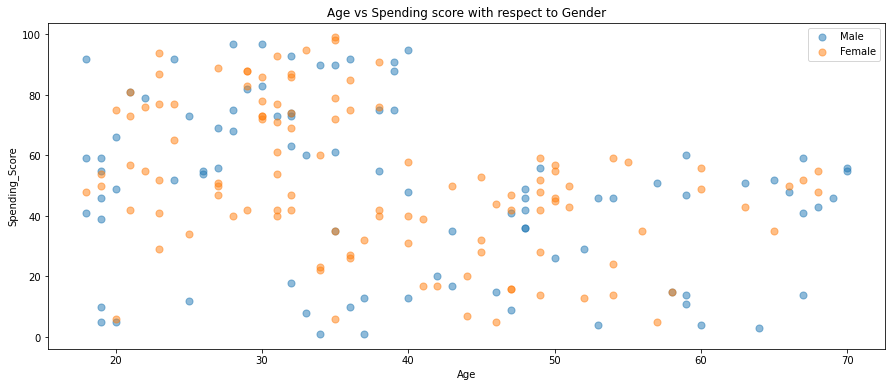

In [88]:
#Age and Spending_Score
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Spending_Score' , data = dataset[dataset['Gender'] == gender] ,
                s = 50 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Spending_Score') 
plt.title('Age vs Spending score with respect to Gender')
plt.legend()
plt.show()

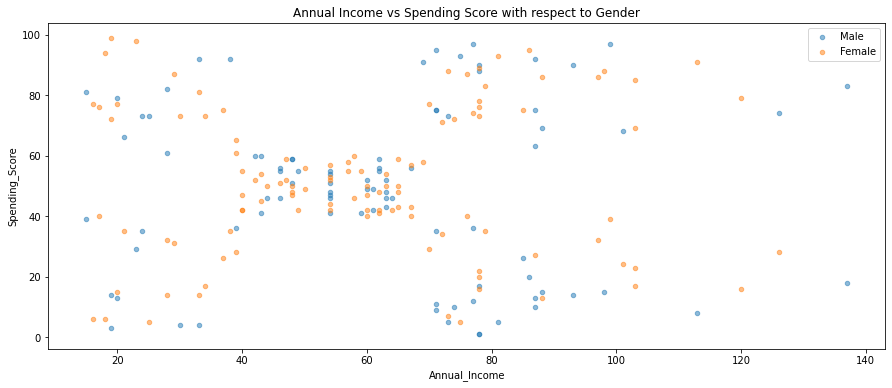

In [89]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual_Income' , y = 'Spending_Score' , data = dataset[dataset['Gender'] == gender] ,
                s = 20 , alpha = 0.5 , label = gender)
plt.xlabel('Annual_Income'), plt.ylabel('Spending_Score') 
plt.title('Annual Income vs Spending Score with respect to Gender')
plt.legend()
plt.show()

In [90]:
# From the last plot we are able to see 5 groups to which the customers (represented with the dots) belong.
# From this plot we can derive some intuition as to how many clusters will we have. 
# We are going to test this assumption in the end with chaning the number of clusters that the model uses.

In [91]:
# Import the model and fit the data
from sklearn.cluster import KMeans
import numpy as np

In [92]:
#We will be using a measure called Inertia
# Inertia measures how well a dataset was clustered by K-Means. 
#It is calculated by measuring the distance between each data point and its centroid (the central point of the cluster - the calculated point)
# All distances in the cluster are  squared and these squares are summed across one cluster. 
# A good model is one with low inertia AND a low number of clusters K (stand for the number of clusters).

In [93]:
X1 = dataset[['Age' , 'Spending_Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    model = (KMeans(n_clusters = n, max_iter=300,  random_state= 42) )
    model.fit(X1)
    inertia.append(model.inertia_)

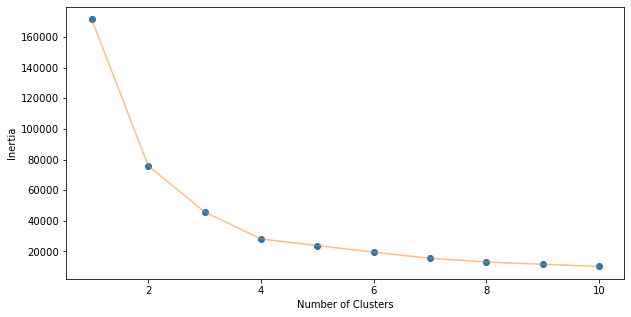

In [94]:
plt.figure(1 , figsize = (10 ,5)) #set the size of the picture that is the plot
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [95]:
model1 = (KMeans(n_clusters = 4 , random_state= 42 ) )
model1.fit(X1)
labels1 = model1.labels_
centroids1 = model1.cluster_centers_ # the centers of the cluster are represented by a dot

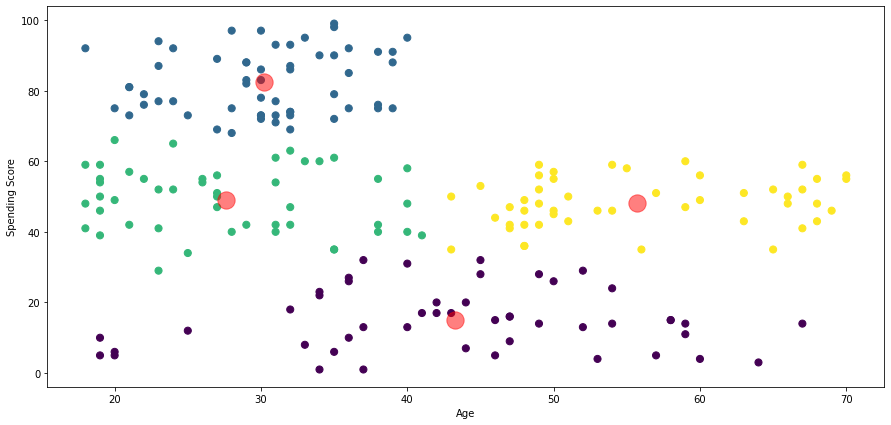

In [96]:
plt.figure(1 , figsize = (15 , 7) )
plt.scatter( x = 'Age' ,y = 'Spending_Score' , data = dataset , c = labels1 , s = 50 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5) # red dots that represent the centers of clusters
plt.ylabel('Spending Score') , plt.xlabel('Age')
plt.show()

In [97]:
X2 = dataset[['Age' , 'Annual_Income']].iloc[: , :].values
inertia2 = []
for n in range(1 , 11): # we are trying values between 1 and 11 for clusters and seeing how the model Inertia decreases
    model = (KMeans(n_clusters = n, max_iter=300,  random_state= 42) )
    model.fit(X2)
    inertia2.append(model.inertia_)

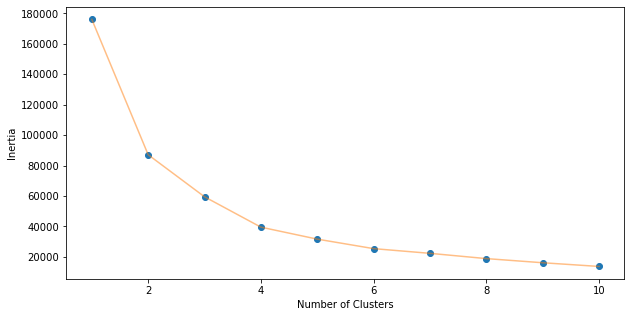

In [98]:
plt.figure(1 , figsize = (10 ,5)) #set the size of the picture that is the plot
plt.plot(np.arange(1 , 11) , inertia2 , 'o')
plt.plot(np.arange(1 , 11) , inertia2 , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

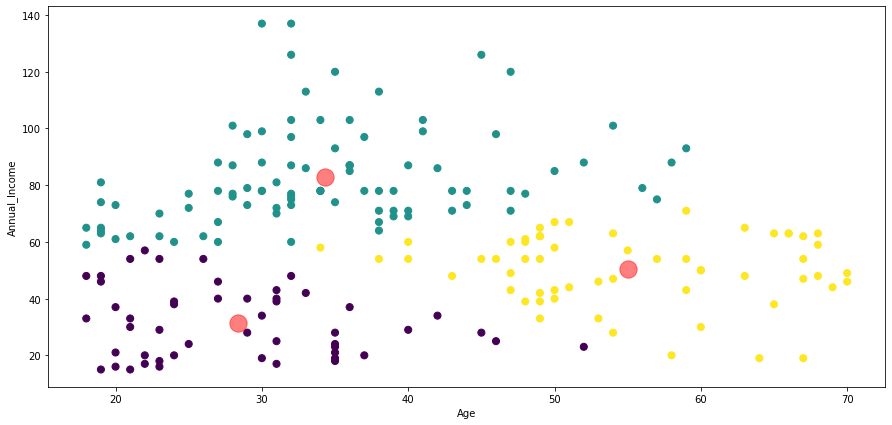

In [99]:
#Age and Annual_income

model2 = (KMeans(n_clusters = 3 , random_state= 42 ) )
model2.fit(X2)
labels2 = model2.labels_
centroids2 = model2.cluster_centers_ # the centers of the cluster are represented by a dot

plt.figure(1 , figsize = (15 , 7) )
plt.scatter( x = 'Age' ,y = 'Annual_Income' , data = dataset , c = labels2 , s = 50 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5) # red dots that represent the centers of clusters
plt.ylabel('Annual_Income') , plt.xlabel('Age')
plt.show()

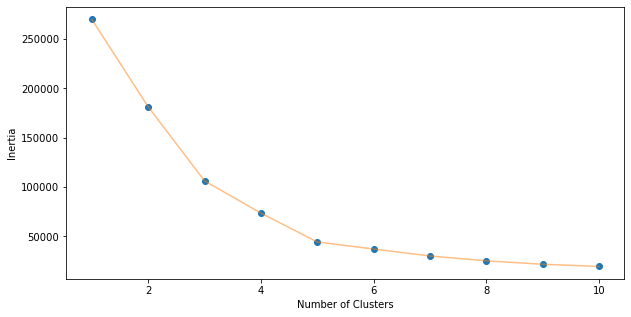

In [100]:
# Most interesting is the relationship between Annual_Income and Spending_Score
# as we have previously seen that there is an indication that we might have 5 clusters.

X3 = dataset[['Annual_Income', 'Spending_Score']].iloc[: , :].values
inertia3 = []
for n in range(1 , 11): # we are trying values between 1 and 11 for clusters and seeing how the model Inertia decreases
    model =  (KMeans(n_clusters = n, max_iter=300,  random_state= 42) )
    model.fit(X3)
    inertia3.append(model.inertia_)
    
plt.figure(1 , figsize = (10 ,5)) #set the size of the picture that is the plot
plt.plot(np.arange(1 , 11) , inertia3 , 'o')
plt.plot(np.arange(1 , 11) , inertia3 , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

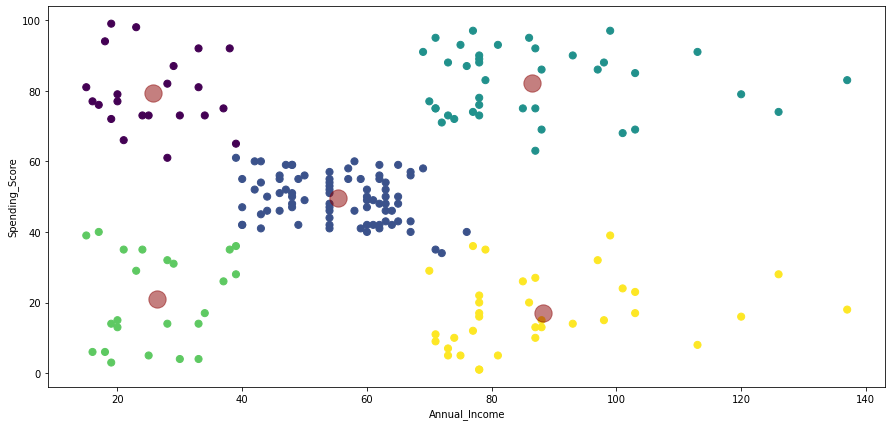

In [105]:
#Annual_income and Spending_Score

model3 = (KMeans(n_clusters = 5, random_state= 42 ) ) # changing the number of cluster (n-clusters) we get different plots
model3.fit(X3)
labels3 = model3.labels_
centroids3 = model3.cluster_centers_ # the centers of the cluster are represented by a dot

plt.figure(1 , figsize = (15 , 7) )
plt.scatter( x = 'Annual_Income', y='Spending_Score' , data = dataset , c = labels3 , s = 50 )
plt.scatter(x = centroids3[: , 0] , y =  centroids3[: , 1] , s = 300 , c = 'darkred' , alpha = 0.5) # red dots that represent the centers of clusters
plt.xlabel('Annual_Income') , plt.ylabel('Spending_Score')
plt.show()

In [102]:
#Example of using too many clusters - they can become meaningless

model4 = (KMeans(n_clusters = 9 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
model4.fit(X3)
labels4 = model4.labels_
centroids4 = model4.cluster_centers_

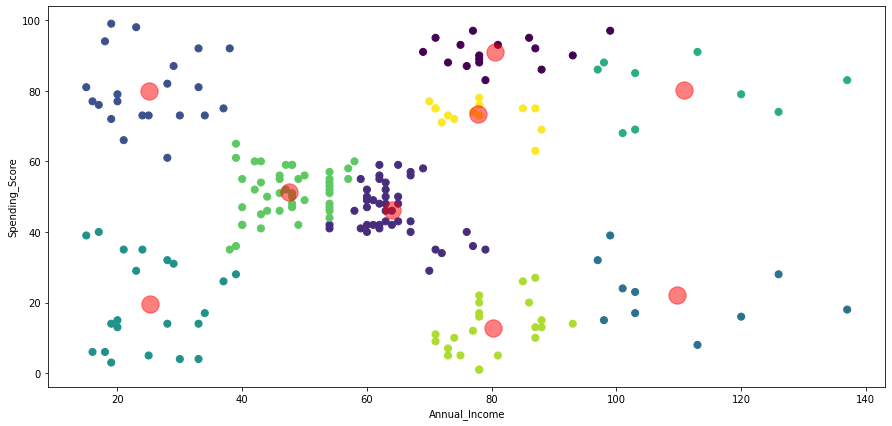

In [103]:
plt.figure(1 , figsize = (15 , 7) )
plt.scatter( x = 'Annual_Income', y='Spending_Score' , data = dataset , c = labels4 , s = 50 )
plt.scatter(x = centroids4[: , 0] , y =  centroids4[: , 1] , s = 300 , c = 'red' , alpha = 0.5) # red dots that represent the centers of clusters
plt.xlabel('Annual_Income') , plt.ylabel('Spending_Score')
plt.show()